In [1]:
import os
import zipfile
from shutil import copyfile
import numpy as np
import random
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as tf
from google.colab import files
import glob
import pandas as pd
from keras import models
from keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
local_zip = "/content/drive/MyDrive/flowers_new.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/flower_new")
zip_ref.close()

In [4]:
def convert_image(source, label):
  fname = os.listdir(source)
  images= None
  
  for i,value in enumerate(fname):
    source_path = os.path.join(source, fname[i])
    if os.path.getsize(source_path)==0:
      print("file has zero size")
    else:
      img=image.load_img(source_path, target_size=(200, 200)) # Load image
      x=image.img_to_array(img)                               # Image ot array
      x=tf.image.rgb_to_grayscale(x)                          # gray scale conversion
      x=np.expand_dims(x, axis=0)
      if images is None:
        images = x
      else:
        images = np.vstack((images, x))
  print(images.shape)
  images=images.reshape(images.shape[0], 200*200*1)
  print(images.shape)
  label_in = np.ones((len(fname), 1))
  label_in.fill(label)
  print(label_in.shape)
  images_new=np.hstack((images,label_in))
  print(images_new.shape)
  return images_new


In [5]:
daisy_source_dir = "/flower_new/flowers/daisy"

dandelion_source_dir = "/flower_new/flowers/dandelion"

rose_source_dir = "/flower_new/flowers/rose"

sunflower_source_dir = "/flower_new/flowers/sunflower"

tulip_source_dir = "/flower_new/flowers/tulip"

In [6]:
daisy = convert_image(daisy_source_dir, 0)
dandelion = convert_image(dandelion_source_dir, 1)
rose = convert_image(rose_source_dir, 2)
sunflower = convert_image(sunflower_source_dir, 3)
tulip = convert_image(tulip_source_dir, 4)

(769, 200, 200, 1)
(769, 40000)
(769, 1)
(769, 40001)
(1052, 200, 200, 1)
(1052, 40000)
(1052, 1)
(1052, 40001)
(784, 200, 200, 1)
(784, 40000)
(784, 1)
(784, 40001)
(734, 200, 200, 1)
(734, 40000)
(734, 1)
(734, 40001)
(984, 200, 200, 1)
(984, 40000)
(984, 1)
(984, 40001)


In [7]:
data_array = np.vstack((daisy, dandelion, rose, sunflower, tulip))
data_array.shape

(4323, 40001)

In [8]:
np.random.shuffle(data_array)
data_array[:10,-1]

array([2., 0., 0., 2., 0., 0., 3., 4., 1., 1.])

In [10]:
train_data, test_data, train_labels, test_labels=train_test_split(data_array[0:,:-1], data_array[:,-1], test_size=0.4, random_state=1)

In [11]:
train_data.shape

(2593, 40000)

In [12]:
test_data.shape

(1730, 40000)

In [13]:
train_labels.shape

(2593,)

In [14]:
test_labels.shape

(1730,)

In [15]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
np.unique(test_labels)

array([0., 1.], dtype=float32)

In [16]:
train_data=train_data.astype("float32")/255
test_data = test_data.astype("float32")/255

In [ ]:
# model=models.Sequential()
# model.add(layers.Dense(64,kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001) , activation="relu", input_shape=(22500,)))
# model.add(layers.Dropout(.1))
# model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=.001, l2=0.001), activation = "relu" ))
# model.add(layers.Dropout(.1))
# model.add(layers.Dense(5, activation="softmax"))
# model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# partial_train_data=train_data[500:]
# partial_train_label = train_labels[500:]
# val_data = train_data[:500]
# val_label = train_labels[:500]

In [ ]:
# model=models.Sequential()
# model.add(layers.Dense(1024, activation="relu", input_shape=(40000,)))
# #model.add(layers.Dropout(.1))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# model.add(layers.Dense(1024, activation = "relu" ))
# #model.add(layers.Dropout(.1))
# model.add(layers.Dense(5, activation="softmax"))
# model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# history=model.fit(partial_train_data,partial_train_label, epochs =25, batch_size=128, validation_data=(val_data,val_label))

In [32]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64, activation="relu", input_shape=(40000,)))
  # model.add(layers.Dense(64, activation = "relu" ))
  # model.add(layers.Dense(32, activation = "relu" ))
  model.add(layers.Dense(5, activation="softmax"))
  model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
  return model

In [33]:
k= 4
num_val_sample = len(train_data) // k
num_epochs =100
all_scores = []
all_val_loss_histories = []
all_val_acc_histories = []
all_loss_histories =[]
all_acc_histories = []

for i in range(k):
  print("processing fold #",i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_labels = train_labels[i*num_val_sample: (i+1)*num_val_sample]

  partial_train_data=np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
  partial_train_labels=np.concatenate([train_labels[:i*num_val_sample], train_labels[(i+1)*num_val_sample:]], axis=0)

  model=build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs= num_epochs, batch_size=512, verbose=1)
  val_loss, val_acc = model.evaluate(test_data, test_labels, verbose=0)
  val_loss_history = history.history["val_loss"]
  val_acc_history = history.history["val_accuracy"]
  loss_history = history.history["loss"]
  acc_history = history.history["accuracy"]
  all_loss_histories.append(loss_history)
  all_acc_histories.append(acc_history)
  all_val_loss_histories.append(val_loss_history)
  all_val_acc_histories.append(val_acc_history)
  all_scores.append(val_loss)
ave_val_loss_hist = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
ave_loss_hist = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
ave_val_acc_hist = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
ave_acc_hist = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
all_scores


processing fold # 0
Epoch 1/100
4/4 [==============================] - 2s 392ms/step - loss: 49.6927 - accuracy: 0.2025 - val_loss: 70.6398 - val_accuracy: 0.1698
Epoch 2/100
4/4 [==============================] - 1s 208ms/step - loss: 47.7230 - accuracy: 0.1916 - val_loss: 14.3216 - val_accuracy: 0.2176
Epoch 3/100
4/4 [==============================] - 1s 202ms/step - loss: 15.0476 - accuracy: 0.1943 - val_loss: 11.9115 - val_accuracy: 0.2469
Epoch 4/100
4/4 [==============================] - 1s 209ms/step - loss: 10.1783 - accuracy: 0.2106 - val_loss: 5.4319 - val_accuracy: 0.2438
Epoch 5/100
4/4 [==============================] - 1s 204ms/step - loss: 5.8514 - accuracy: 0.2056 - val_loss: 3.3202 - val_accuracy: 0.1698
Epoch 6/100
4/4 [==============================] - 1s 203ms/step - loss: 2.4899 - accuracy: 0.1727 - val_loss: 1.5979 - val_accuracy: 0.1852
Epoch 7/100
4/4 [==============================] - 1s 203ms/step - loss: 1.5997 - accuracy: 0.2203 - val_loss: 1.6046 - val_acc

[1.575373649597168, 6.209460258483887, 4.172245025634766, 1.5831730365753174]

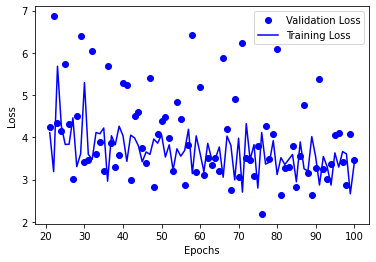

In [38]:
plt.plot(range(1, len(ave_val_loss_hist)+1)[20:], ave_val_loss_hist[20:], "bo", label="Validation Loss")
plt.plot(range(1, len(ave_val_loss_hist)+1)[20:], ave_loss_hist[20:], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

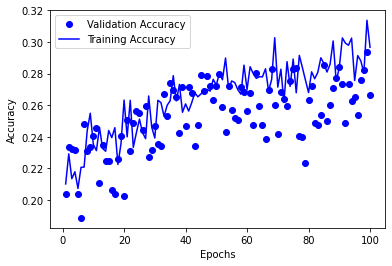

In [37]:
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_val_acc_hist[:], "bo", label="Validation Accuracy")
plt.plot(range(1, len(ave_val_acc_hist)+1)[:], ave_acc_hist[:], "b", label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()